# Decision Tree classifier

This algorithm predicts a label by learning from the provided data and representing it in a tree structure.

In [2]:
# importing necessary libraries 
import seaborn as sb
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
#loading the dataset 
df = sb.load_dataset('titanic') 
# viewing the first 5 of the dataset
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# choosing the input and target variables 
X = df[['pclass','sex','age','sibsp','fare','class']] 
Y = df['survived']
# econding categorical variables 
le = LabelEncoder()
X['sex'] = le.fit_transform(X['sex']) 
genders = list(le.classes_) 
X['class'] = le.fit_transform(X['class']) 
classes = list(le.classes_) 
print('genders: ',genders) 
print('classes: ',classes)

genders:  ['female', 'male']
classes:  ['First', 'Second', 'Third']


C:\Users\Sakriya Pyakurel\AppData\Local\Temp\ipykernel_14052\3207225667.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex'] = le.fit_transform(X['sex'])
C:\Users\Sakriya Pyakurel\AppData\Local\Temp\ipykernel_14052\3207225667.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['class'] = le.fit_transform(X['class'])


In [5]:
# check for missing values 
X.isna().sum()

pclass      0
sex         0
age       177
sibsp       0
fare        0
class       0
dtype: int64

In [6]:
# handling missing values in age column through mean
X['age']=X['age'].fillna(X['age'].median())

C:\Users\Sakriya Pyakurel\AppData\Local\Temp\ipykernel_14052\2249130379.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age']=X['age'].fillna(X['age'].median())


In [7]:
# Applying test,train and split 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42) 
# Training the model 
classifier = DecisionTreeClassifier() 
classifier.fit(X_train,Y_train) 
# calculating the accuracy 
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_true=Y_test,y_pred=y_pred) 
accuracy

0.753731343283582

In [8]:
# predicting survived column through custom function 
def prediction(pclass,sex,age,sibsp,fare,choosen_class):
    sex_index = genders.index(sex) 
    class_index = classes.index(choosen_class) 

    survived = classifier.predict([[pclass,sex_index,age,sibsp,fare,class_index]]) 
    return 'yes' if survived == 1 else 'No'


survived = prediction(1,'male',45,0,95,'First')
survived

c:\Users\Sakriya Pyakurel\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


'yes'

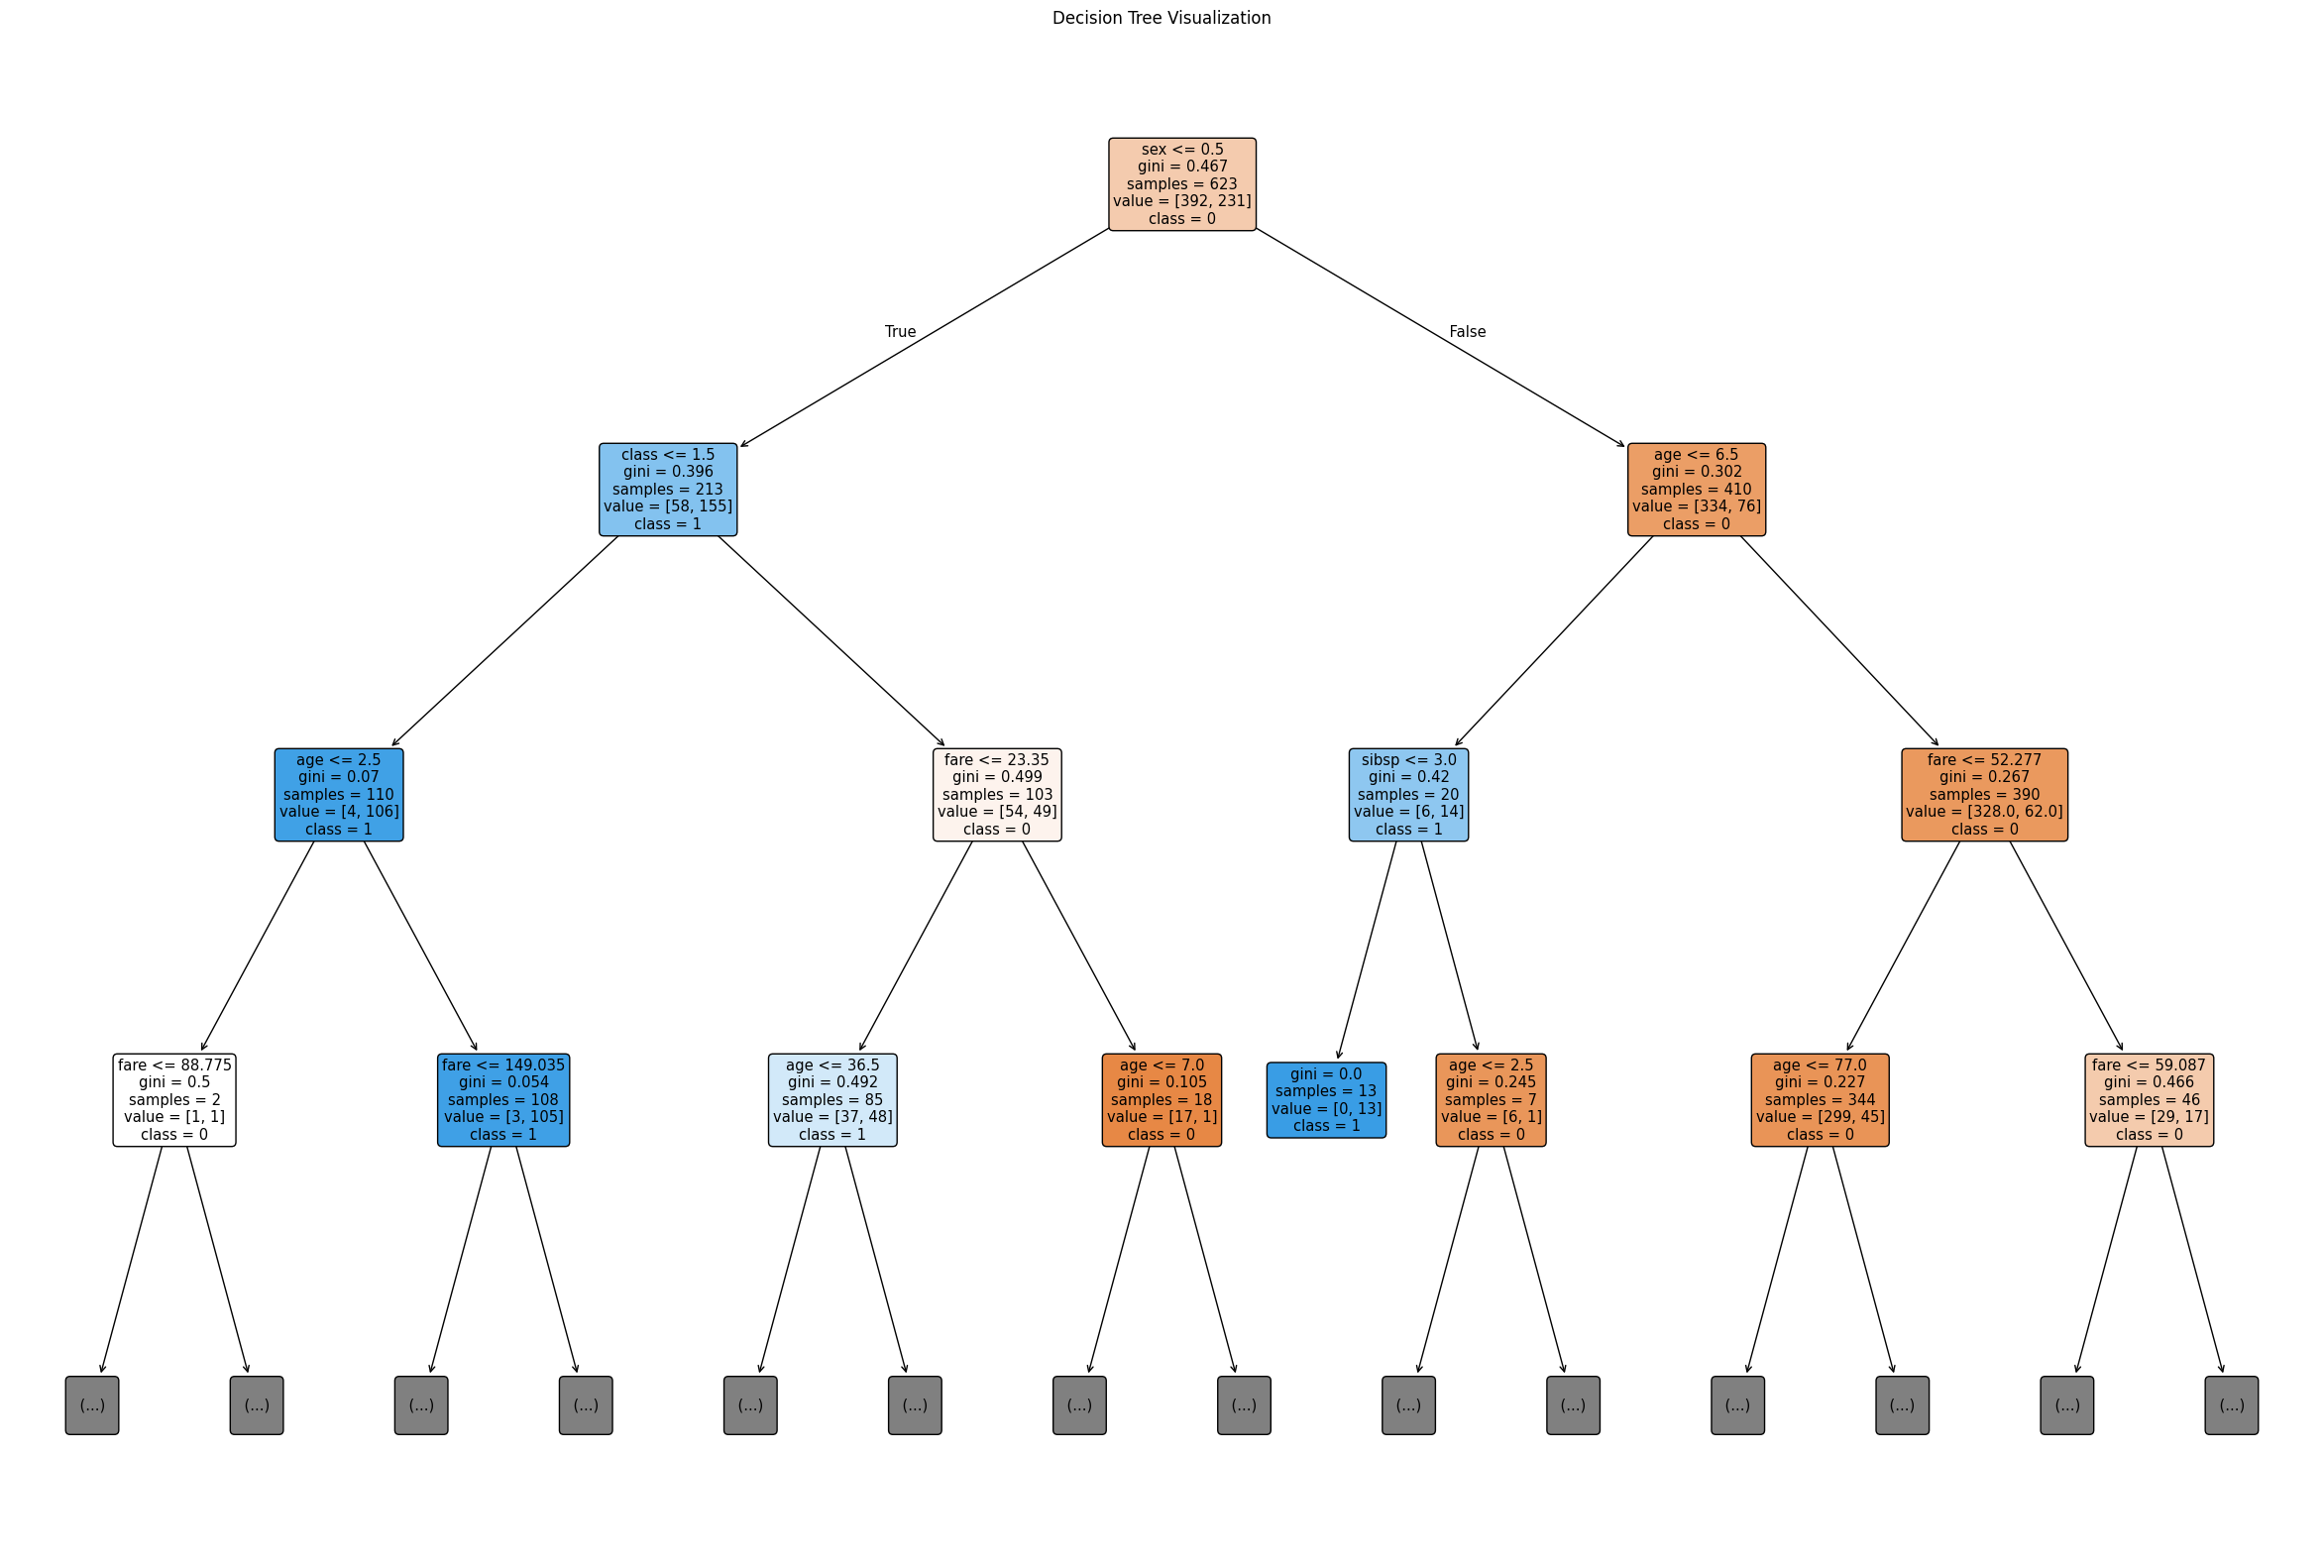

In [16]:
# visualizing the model
plt.figure(figsize=(30,20))
plot_tree(classifier, 
          filled=True, 
          rounded=True, 
          max_depth=3,
          class_names=classifier.classes_.astype(str), 
          feature_names=X.columns if hasattr(X, 'columns') else None)
plt.title("Decision Tree Visualization")
plt.show()

<b>Interpretations:</b> 

i.Sex is the most important feature: The very first split is based on it.<br>
ii.Age and Fare are used frequently.<br>
iii.Class and SibSp played secondary roles in determining the survival of a passenger.<br>
iv.Many young children and females survived, while males in lower classes or with lower fares were more likely not to.<br>